| Asignatura | Datos del alumno | Fecha |
|------------|------------------|-------|
| Percepción<br>Computacional | Apellidos: Sánchez Alvarez<br>Nombre(s): Arturo Avelino | 11 de dic del 2024 |

# Laboratorio: Eliminación de anomalías y ajuste de intensidad en imágenes

## Objetivo

Explorar y estudiar cómo funciona el procesamiento de imágenes digitales a través de la implementación de técnicas de procesamiento que buscan solucionar problemas, como la eliminación de anomalías (tales como el ruido), así como la mejora de contraste en imágenes con un desbalance de intensidades. Para ello, se analizan enfoques como filtros lineales y no lineales, así como la ecualización de histogramas.

## Pre-requisitos
A lo largo de este reporte se estarán utilizando diversas librerías conocidas de visión computacional y ciencia de datos que servirán de apoyo. Se enlistan e importan las librerías:

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

## Eliminación de ruido

### Objetivo
Analizar la eliminación de ruido a través de la implementación de una técnica propia y compararla con una técnica implementada directamente dentro de la librería **OpenCV**. Para la actividad se estará agregando ruido por medio de la técnica sal y pimienta.

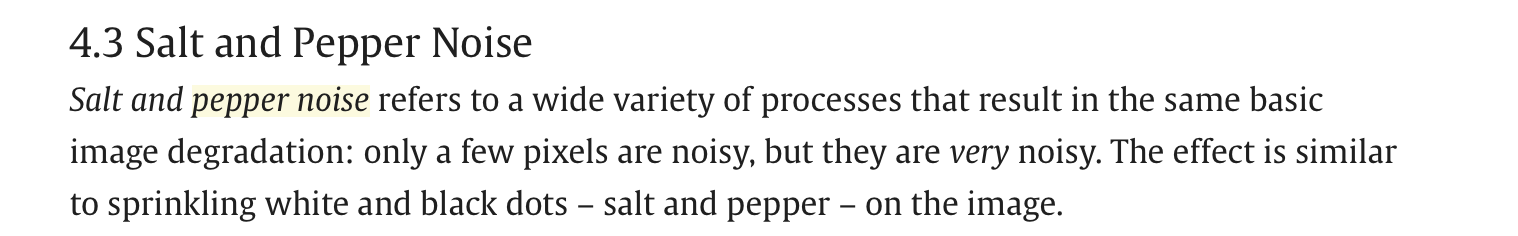

### Técnica 1: Implementación propia

Se tiene una imagen original en escala de grises a la cual se la aplicará ruido de tipo sal y pimienta. Una vez teniendo la imagen con ruido, se le aplicarán 2 técnicas de eliminación de anomalías y compararán su desempeños. Para la actividad se seleccionaron un filtro lineal y uno no lineal, para poder enriquecer la comparación y experimentar con ambos tipos. 

In [3]:
def add_salt_pepper_noise(image, prob):
    white = 255
    black = 0

    noisy_image = image.copy()
    random_matrix = np.random.random(image.shape)

    noisy_image[random_matrix < prob/2] = black
    noisy_image[random_matrix > (1 - prob/2)] = white

    return noisy_image

#### a. Descripción

La primer técnica a utilizar es una implementación propia del **filtro de mediana**. El filtro de mediana consiste en utilizar un filtro o kernel sobre cada uno de los pixeles en la imagen recorriendo todas las filas y columnas, sacando del kernel y reemplazar el pixel evaluado con el resultado. En esta implementación se utiliza por defecto un kernel de 3x3.

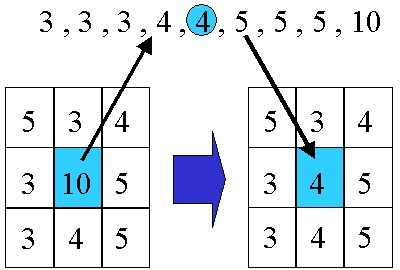

> Median filters provide excellent noise reduction capabilities for certain types of random noise, with considerably less blurring than linear smoothing filters of similar size. Median filters are particularly effective in the
presence of impulse noise (sometimes called salt-and-pepper noise, when it manisfests itself as white and black dots superimposed on an image).
(Gonzalez, R. C., & Woods, R. E.,2018, p. 175)

Al haber seleccionado un kernel de 3x3, es de suma importancia considerar los bordes. Una forma de manejar esto es por medio de realizar un **padding**. En la implementación se está aplicando un padding de ceros en los bordes para poder evaluar todos los pixeles.

Pasos de la implementación:
1. Obtener la altura y ancho de la matriz de pixeles de la imagen.
2. Agregar un padding con ceros alrededor de la matriz de la imagen original.
3. Generar una nueva matriz únicamente de ceros basada en la imagen original.
4. Recorrer la matriz de la imagen original (con su correspondiente padding) pixel por pixel, por filas y columnas.
5. En cada pixel, se obtiene el kernel de 3x3.
6. Se calcula la mediana
7. Se aplica el resultado de la mediana en la matriz de ceros.

#### b. Implementación

In [4]:
def median_filter_3x3(image):
    height, width = image.shape
    padded_image = np.pad(image, pad_width=1, mode='constant', constant_values=0)
    filtered_image = np.zeros_like(image)

    for i in range(1, height + 1):
        for j in range(1, width + 1):
            region = padded_image[i-1:i+2, j-1:j+2]
            filtered_image[i-1, j-1] = np.median(region)

    return filtered_image

### Técnica 2: OpenCV

#### a. Descripción

La segunda técnica utilizada será el filtro gaussiano.

El filtro gaussiano el una técnica utilizada para la reducción de ruido, suavizando la imagen de manera uniforme. Utiliza un proceso de convolución, utilizando un kernel normalizado cuyos valores suman 16. 

Kernel gaussiano 3x3:

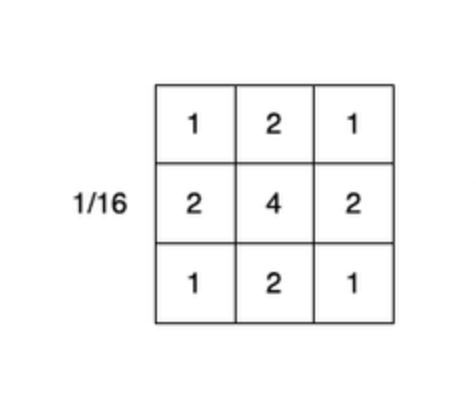

Similar al proceso de filtrado con mediana, se tiene que recorrer la matriz de pixeles de la imagen posición a posición; sin embargo, en este caso en lugar de obtener la mediana se realiza un proceso de convolución, es decir, se van multiplicando los valores del kernel de la imagen original con los del kernel gaussiano. Posteriormente se suman todos los valores resultantes de las multiplicaciones, y el resultado es reemplazado en el pixel que se evaluaba.

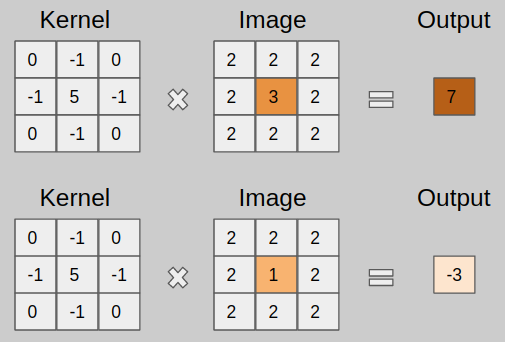

*NOTA: La imagen se usa de manera representativa para el proceso de convolución. Habría que reemplazar el kernel, por un kernel gaussiano.*



#### b. Implementación

Esta es una implementación nativa de la librería OpenCV. Su forma de utilizarse se muestra a continuación:

In [ ]:
# cv.GaussianBlur(src, ksize, sigmaX, sigmaY=None, borderType=None)

### Medida de desempeño 

#### a. Descripción

Como contamos con una imagen original a la que le aplicamos ruido de manera manual, podemos medir de manera cuantitiva la eficiencia de las 2 técnicas utilizadas y compararlas de manera directa.

Se ha seleccionado utilizar **PSNR (Peak Signal-to-Noise Ratio)** como medida de desempeño para evaluación. 

El PSNR mide la relación entre la máxima posible potencia de una señal de la imagen y la potencia del ruido. La potencia del ruido se mide decibelios. A mayor sea el valor, es un mejor filtrado.

### Resultados

#### a. Imágenes originales: Imagen 1, Imagen 2

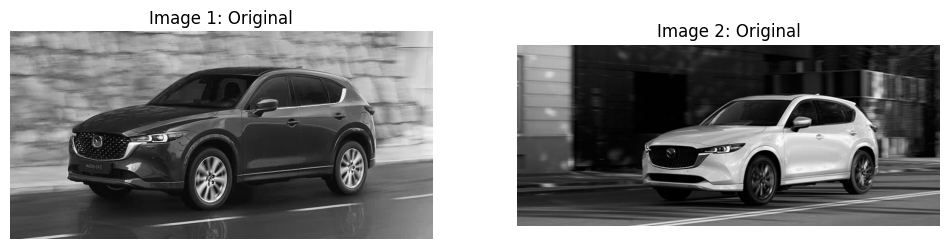

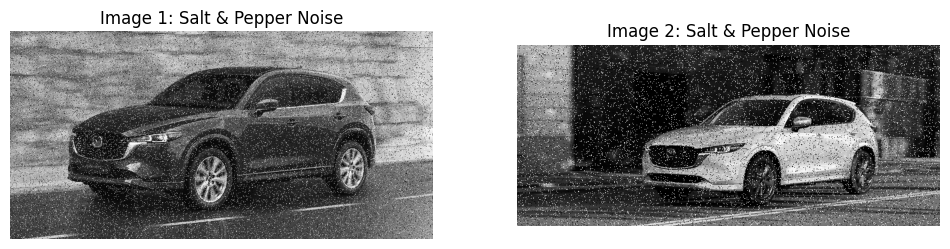

In [31]:
def show_two_images(img1, img_title, img2, img2_title):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
    plt.title(img_title)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.title(img2_title)
    plt.axis('off')

    plt.show()

img1_path = './images/img1.jpg'
img2_path = './images/img2.jpg'

img1_gs = cv.imread(img1_path,  cv.IMREAD_GRAYSCALE)
img2_gs = cv.imread(img2_path, cv.IMREAD_GRAYSCALE)

show_two_images(img1_gs, "Image 1: Original", img2_gs, "Image 2: Original")

salt_pepper_prob = 0.10
img1_noisy = add_salt_pepper_noise(img1_gs, salt_pepper_prob)
img2_noisy = add_salt_pepper_noise(img2_gs, salt_pepper_prob)

show_two_images(img1_noisy, "Image 1: Salt & Pepper Noise", img2_noisy, "Image 2: Salt & Pepper Noise")

#### b. Técnica 1. Imagen 1 (anomalía), Imagen 2 (anomalía)

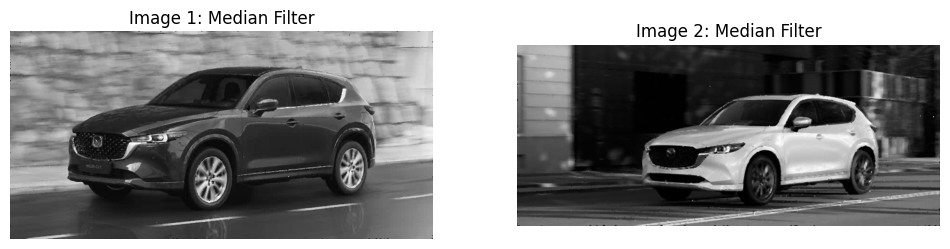

Image 1 Median filter PSNR: 15.031234283418456
Image 2 Median filter PSNR: 15.031234283418456


In [7]:
img1_filtered_median = median_filter_3x3(img1_noisy)
img2_filtered_median = median_filter_3x3(img2_noisy)

show_two_images(img1_filtered_median, "Image 1: Median Filter", img2_filtered_median, "Image 2: Median Filter")

psnr1_median = cv.PSNR(img1_noisy, img1_filtered_median)
psnr2_median = cv.PSNR(img2_noisy, img2_filtered_median)

print(f"Image 1 Median filter PSNR: {psnr1_median}")
print(f"Image 2 Median filter PSNR: {psnr1_median}")

#### c. Técnica 2. Imagen 1 (anomalía), Imagen 2 (anomalía) 

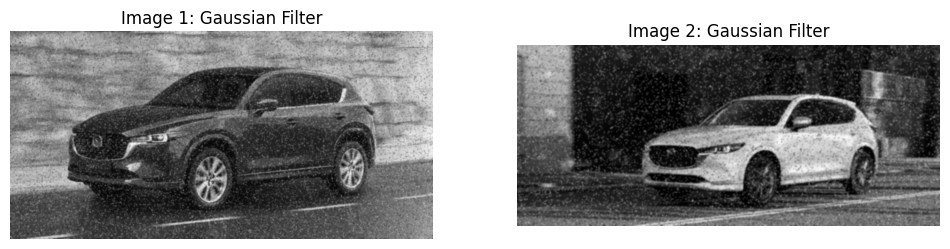

Image 1 Gaussian filter PSNR: 15.986590002591418
Image 2 Guassian filter PSNR: 15.425008788012864


In [8]:
img1_filtered_gauss = cv.GaussianBlur(img1_noisy, (5, 5), 0)
img2_filtered_gauss = cv.GaussianBlur(img2_noisy, (5, 5), 0)

show_two_images(img1_filtered_gauss, "Image 1: Gaussian Filter", img2_filtered_gauss, "Image 2: Gaussian Filter")

psnr1_gauss = cv.PSNR(img1_noisy, img1_filtered_gauss)
psnr2_gauss = cv.PSNR(img2_noisy, img2_filtered_gauss)

print(f"Image 1 Gaussian filter PSNR: {psnr1_gauss}")
print(f"Image 2 Guassian filter PSNR: {psnr2_gauss}")

### Conclusiones

El PSNR es una medida que se mide en decibelios, indicando que mientras mayor sea el número más cerca se encuentra de la imagen original sin anomalías.

Los resultados del filtro gaussiano son mayores, por lo que se puede concluir este filtro tuvo un mejor desempeño.

De manera cualitativa, pudiese parecer que el filtro de mediana quitó una mayor cantidad de ruido, sin embargo, también se pueden observar bordes de los coches más rígidos y con otras ciertas anomalías de pixelado en los bordes. El resultado puede deberse a un sobre suavización de la imagen, siendo mucho más agresiva a comparación del filtro gaussiano. Que a pesar de contar aún con ruido, mantuvo los bordes del automóvil más cercanos al original.


## Mejora de contraste 

### Objetivo

Analizar y lograr una mejora de contraste en una imagen con un desbalance de intensidades de luz. Lo anterior quiere decir que se tiene altos o bajos niveles de tonalidades blancas y negras de manera desproporcionada y se busca lograr una proporción más uniforme de intensidades.

Dado que no se cuenta con una imagen original, no se puede medir de manera cuantitativa una mejora de contraste de los resultados de la aplicación de las técnicas. Sin embargo, a través del uso de herramientas de comparación cualitativas podemos llegar a una conclusión de quien se acerca a un resultado deseable.

### Técnica 1: Implementación propia

#### a. Descripción
Para la técnica propia de mejora de contraste se ha implementado la técnica de ecualización de histograma. Esta técnica busca lograr una distribución más uniforme de las intesidades visualizadas en el histograma.

A partir de los valores del histograma (las frecuencias de intensidades en la imagen) se busca aplanar la gráfica del histograma para tener un distribución uniforme.

Pasos de la implementación:
1. Aplanar a la matriz de la imagen. Convertir la matriz bidimensional a una sola dimensión. Esto porque queremos los valores de manera individual, no por coordenadas.
2. Se genera un nuevo array con ceros de tamaño 255.
3. Calcular el histograma. Se hace el conteo de intensidades por pixeles y se guarda en el anterior array generado.
4. Calcular la distribución cumulativa del histograma.
5. Obtener el valor mínimo de la distribución cumulativa que no sea cero.
6. Normalizar la distribución de frecuencia cumulativa para que se tenga un rango de 0 a 255. Dado que son los límites de las frecuencias.
7. Convertir los valores resultantes, que podrían tener decimales, a números enteros. Son los que utilizamos para las intensidades.

#### b. Implementación

In [36]:
img1_contrasted_path = './images/img1_contrast.jpg'
img2_contrasted_path = './images/img2_contrast.png'
img1_contrasted = cv.imread(img1_contrasted_path, cv.IMREAD_GRAYSCALE)
img2_contrasted = cv.imread(img2_contrasted_path, cv.IMREAD_GRAYSCALE)

def histogram_equalization(image):
    flat_image = image.flatten()
    
    histogram = np.zeros(256, dtype=int)
    for pixel in flat_image:
        histogram[pixel] += 1

    cdf = np.cumsum(histogram)
    
    cdf_min = cdf[np.nonzero(cdf)].min()
    cdf_normalized = (cdf - cdf_min) / (flat_image.size - cdf_min) * 255
    cdf_normalized = cdf_normalized.astype(np.uint8)

    equalized_image = cdf_normalized[image]

    return equalized_image

img1_equalized = histogram_equalization(img1_contrasted)
img2_equalized = histogram_equalization(img2_contrasted)

### Técnica 2: OpenCV

#### a. Descripción
Como segunda técnica de mejora de contraste se selección la técnica de **CLAHE (Contrast Limited Adaptive Histogram Equalization)**. Esta técnica realiza también una ecualización pero de una forma más controlada y localizada.

A diferencia de la ecualización de histograma tradicional que impacta de manera global el contraste, la técnica de CLAHE divide la imagen en pequeñas regiones, similares a un tablero de ajedrez y aplica la ecualización en cada bloque, así como implementar un límite de aumento de contraste para evitar generar mucho contraste.

#### b. Implementación

A través de la misma librería de OpenCV podemos implementar la técnica de CLAHE. Únicamente necesitamos pasarle 2 valores: 
- Límite del clip: Límite del contraste a aplicar. A menor número, menos agresiva es la ecualización.
- Tamaño de los bloques: Por defecto la librería utiliza un tamaño de 8x8

In [37]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img1_clahe = clahe.apply(img1_contrasted)
img2_clahe = clahe.apply(img2_contrasted)

### Resultados

#### a. Imágenes originales: Imagen 1, Imagen 2

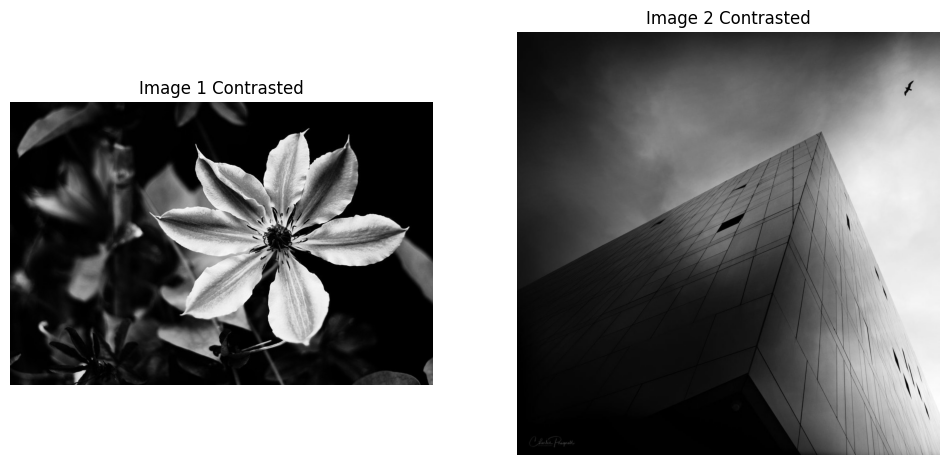

In [25]:
show_two_images(img1_contrasted, "Image 1 Contrasted", img2_contrasted, "Image 2 Contrasted")

#### b. Técnica 1. Imagen 1, Imagen 2



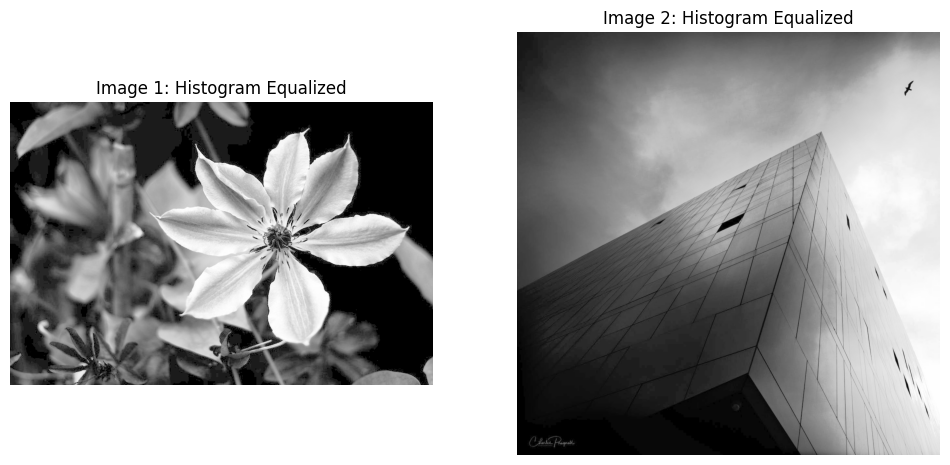

In [26]:
show_two_images(img1_equalized, "Image 1: Histogram Equalized", img2_equalized, "Image 2: Histogram Equalized")

#### c. Técnica 2. Imagen 1, Imagen 2

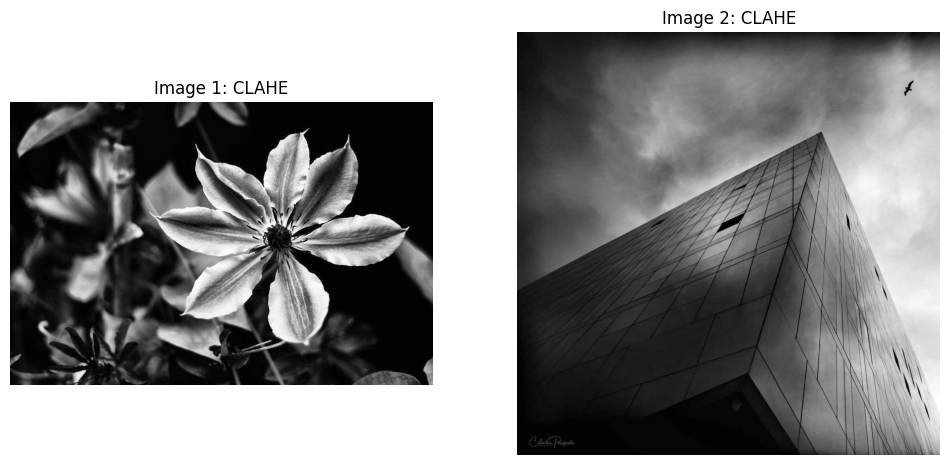

In [35]:
show_two_images(img1_clahe, "Image 1: CLAHE", img2_clahe, "Image 2: CLAHE")

### Histogramas

Para comparar los resultados de mejora de contraste se selección el uso de histogramas. Los histogramas presentan la frecuencia de las intensidades en una imagen digital. Esto quiere decir, un conteo de intensidades. En el eje de las X tenemos del 0 al 255, las posibles intensidades en una imagen en escala de grises; mientras que en el eje Y tenemos la cantidad de veces que se presentan. 

Un histograma con mayores cantidades del lado izquierdo indicaría una imagen con muchos negros, mientras que una imagen con mayor cantidad de intensidades del lado derecho indicaría más blancos.

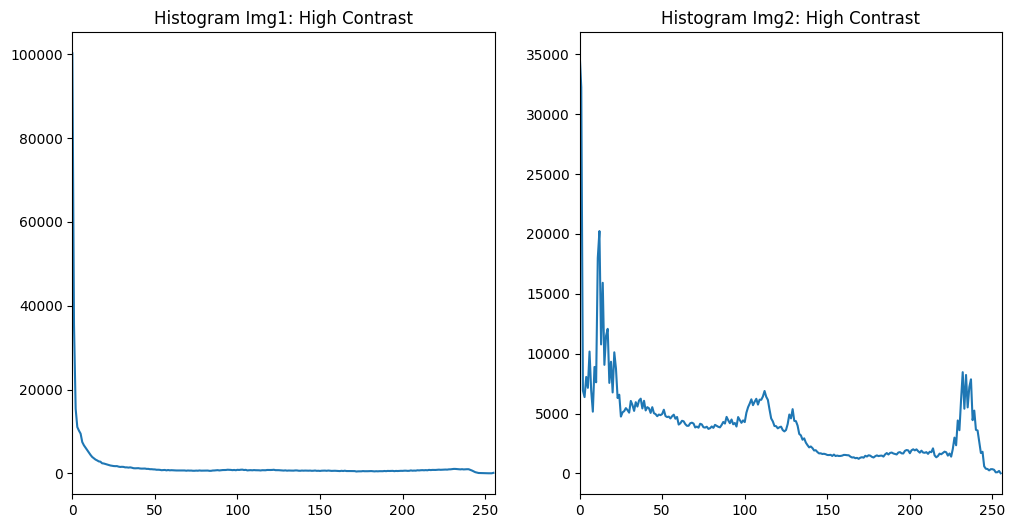

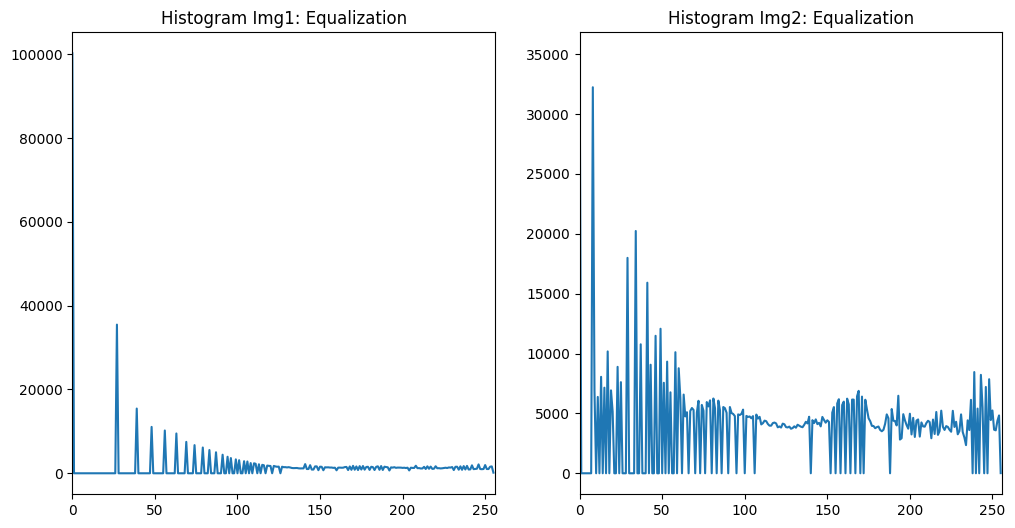

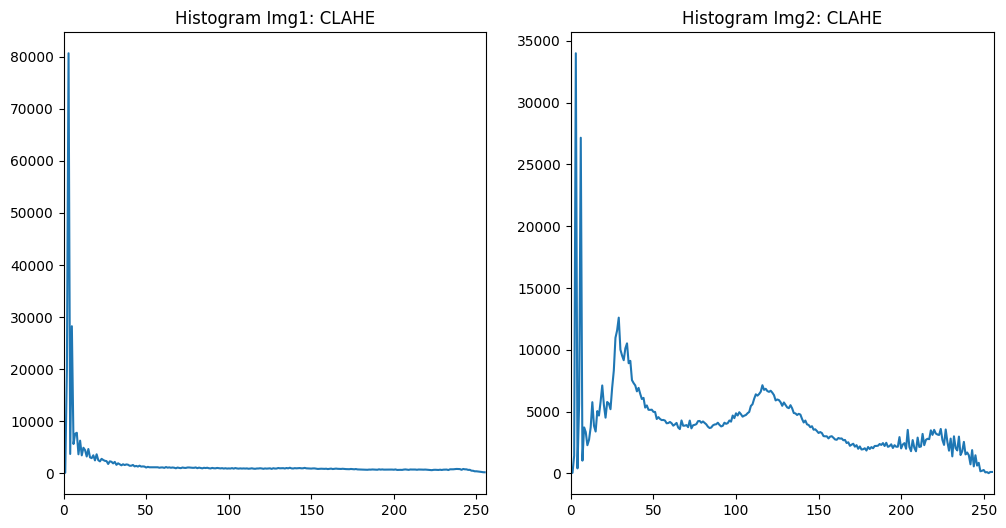

In [38]:
def show_two_histograms(hist1, hist1_title, hist2, hist2_title):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(hist1)
    plt.title(hist1_title)
    plt.xlim([0, 256])

    plt.subplot(1, 2, 2)
    plt.plot(hist2)
    plt.title(hist2_title)
    plt.xlim([0, 256])

    plt.show()

hist1_contrasted = cv.calcHist([img1_contrasted], [0], None, [256], [0, 256])
hist2_contrasted = cv.calcHist([img2_contrasted], [0], None, [256], [0, 256])
show_two_histograms(hist1_contrasted, "Histogram Img1: High Contrast", hist2_contrasted, "Histogram Img2: High Contrast")


hist1_equalized = cv.calcHist([img1_equalized], [0], None, [256], [0, 256])
hist2_equalized = cv.calcHist([img2_equalized], [0], None, [256], [0, 256])
show_two_histograms(hist1_equalized, "Histogram Img1: Equalization", hist2_equalized, "Histogram Img2: Equalization")


hist1_clahe = cv.calcHist([img1_clahe], [0], None, [256], [0, 256])
hist2_clahe = cv.calcHist([img2_clahe], [0], None, [256], [0, 256])
show_two_histograms(hist1_clahe, "Histogram Img1: CLAHE", hist2_clahe, "Histogram Img2: CLAHE")

### Conclusiones

De los resultados podemos observar que la imagen 1 a pesar de verse con mucho contraste, su histograma se encuentra bastante aplanado con la exepción de los negros que cuenta con una gran cantidad. Al ver la imagen tiene un fondo muy negro.

Posterior a la técnica de ecualización tradicional bajaron significativamente los negros y aumentando más las intensidades medias generando una mayor cantidad de grises. Por eso es que al observar la imagen resultante el fondo negro se puede visualizar de mejor manera y con mayor claridad.

Al utilizar la técnica de CLAHE, se puede observar también una distribución más uniforme, pero no de una forma tan agresiva.

En la segunda imagen teníamos una distribución bastante dispar, con un par de picos en intensidades bajas, medias y altas.

Con la técnica de ecualización tradicional se logró aplanar mayormente las regiones medias. Es por ello que en la imagen se pueden observar más detalles que estaban ocultos trás tonalidades negras.

Los resultados de la imagen 2 aplicando la técnica de CLAHE son similares a la imagen 1. Una mejora de contraste y aplanamiento de la distribución, pero no de formas agresivas. También se pueden notar un poco de sharpening en los bordes de la imagen.

## Referencias

Gonzalez, R. C., & Woods, R. E. (2018). Digital image processing (4th ed.). Pearson. ISBN: 978-0133356724

Boncelet, C. (2005). Handbook of Image and Video Processing (2nd ed.). Academic Press.